# Hackathon Part3: Modeling

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error

In [2]:
# read data
%store -r data
%store -r pred

In [3]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,4.025352,12.754289,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.332205,11.474455,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.496508,12.433686,13,7688,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.258097,12.090325,13,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.688879,10.947204,14,14084,0,55,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X = data.drop(['wage'], axis=1)
y = data['wage']
ss = StandardScaler()
ss.fit_transform(X)

array([[ 1.21020085,  1.20274566, -1.95761158, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.70529478, -0.83610079, -0.41289103, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.25124723,  0.69200717,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       ...,
       [-0.42402074,  1.35674103, -0.02671089, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.08864292,  1.37444309,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.28036788,  0.50479495,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849]])

In [5]:
ss.transform(pred)

array([[-1.01847589,  0.52974894, -1.1852513 , ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.13862009, -0.94595582, -0.41289103, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.70529478,  1.16037578,  0.74564938, ...,  0.34861264,
        -0.03508772, -0.02147849],
       ...,
       [ 0.13862009,  1.3307421 ,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.54375528, -1.05463804,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.08864292,  0.18045919,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849]])

In [6]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):

    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [7]:
pipe_params = [
    {
        'model__estimator': [LogisticRegression()],
        'model__estimator__penalty': ['l1', 'l2']
    },
    {
        'model__estimator': [RandomForestClassifier()],
        'model__estimator__min_samples_split': [2, 3, 4, 5],
        'model__estimator__min_samples_leaf' : [13, 14, 15, 16, 17],
    },
#      {
#         'model__estimator': [DecisionTreeClassifier()],
#         'model__estimator__min_samples_split': [2, 3, 4],
#         'model__estimator__min_samples_leaf' : [1, 2, 3, 4],
#         'model__estimator__max_features' : ['auto' , 'sqrt'],
#     },
    {
        'model__estimator': [AdaBoostClassifier()],
        'model__estimator__n_estimators': [70, 80, 90],
        'model__estimator__learning_rate' : [1, 2],
        'model__estimator__algorithm' : ['SAMME', 'SAMME.R']
    },
     {
        'model__estimator': [KNeighborsClassifier()],
        'model__estimator__p': [1, 2],
        'model__estimator__leaf_size' : [30, 20, 10],
    },
     {
        'model__estimator': [BaggingClassifier()],
        'model__estimator__n_estimators': [50, 100, 200, 300],
        'model__estimator__bootstrap' : [True, False]
     },
     {
        'model__estimator': [SVC()],
        'model__estimator__degree' : [2, 3, 4],
        'model__estimator__C' : [10,15,20, 100, 150, 200],

     },
         {
        'model__estimator': [GaussianNB()]
     },

]

# Defining a function to do our model analysis. This function takes in X, y, and any pipe parameters
def model_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)
    pipe = Pipeline([
            ('model', ClfSwitcher())])

    gs = GridSearchCV(pipe, pipe_params, cv=3, verbose=3, n_jobs=3)
    gs.fit(X_train, y_train)

    print(f' Best Parameters: {gs.best_params_}')
    print('')
    print(f' Cross Validation Accuracy Score: {gs.best_score_}')
    print(f' Training Data Accuracy Score: {gs.score(X_train, y_train)}')
    print(f' Testing Data Accuracy Score: {gs.score(X_test, y_test)}')

In [8]:
model_analysis(X, y)

Fitting 3 folds for each of 67 candidates, totalling 201 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  32 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done 201 out of 201 | elapsed:   39.1s finished


 Best Parameters: {'model__estimator': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=90, random_state=None), 'model__estimator__algorithm': 'SAMME.R', 'model__estimator__learning_rate': 1, 'model__estimator__n_estimators': 90}

 Cross Validation Accuracy Score: 0.8532486165197787
 Training Data Accuracy Score: 0.862881738061078
 Testing Data Accuracy Score: 0.8660110633066994


In [17]:
# svc performs the same as adaboosting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(C=20, degree=2, probability=True, random_state=42)
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_train)


# Running cross value scores
cvs = cross_val_score(svc, X_train, y_train, cv=5).mean()
print(svc.score(X_test, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.8653964351567301


In [18]:
# check testing set
test_proba = [i[1] for i in svc.predict_proba(X_test)]

test_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':test_proba})

In [19]:
test_df.head()

,true_values,pred_probs
3398,0,0.681644
4916,0,0.066927
4822,0,0.135689
3439,1,0.854076
96,1,0.818885


In [20]:
# create dataframe of the predicted results
probs = svc.predict_proba(pred)
df_probs = pd.DataFrame(probs)

In [21]:
# pick the column when probs =1
results = df_probs[1]

In [26]:
results.to_csv('./data/results.csv', header = 'wage', index=False)

## Visualization

In [27]:
import matplotlib.pyplot as plt

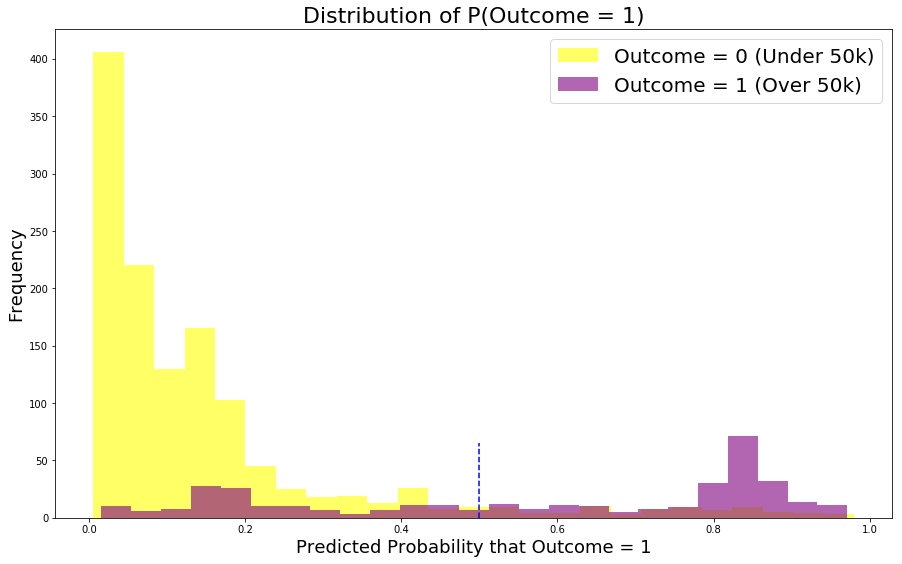

In [29]:
# Create figure to display the predicted probabilities for posts that were classified at California vs Not California.
#
plt.figure(figsize = (15,9))

# Create two histograms of observations.
plt.hist(test_df[test_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='yellow',
         alpha = 0.6,
         label='Outcome = 0 (Under 50k)')
plt.hist(test_df[test_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='purple',
         alpha = 0.6,
         label='Outcome = 1 (Over 50k)')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='blue',
           linestyle = '--')

# Create legend.
plt.legend(fontsize=20);

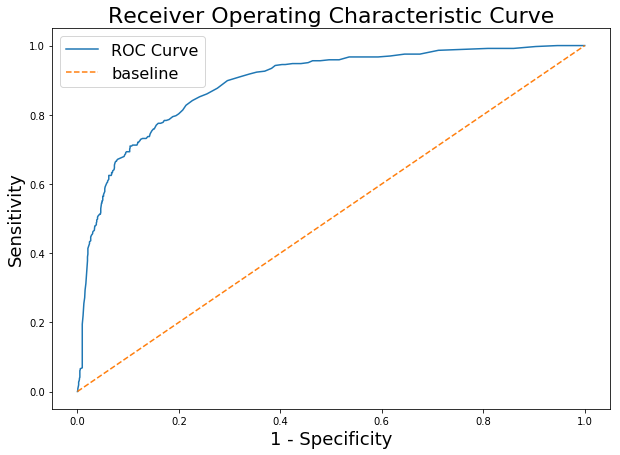

In [32]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(test_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(test_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);